In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("http://bit.ly/w-data")
print("Data is")
df.head(10)

Data is


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Visualizing Data to identify pattern**

Text(0, 0.5, 'Scores')

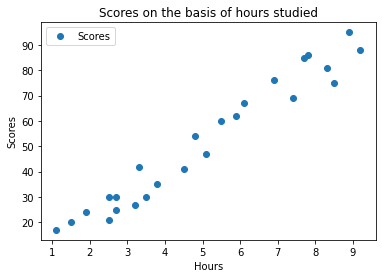

In [ ]:
df.plot(x="Hours", y="Scores", style="o")
plt.title("Scores on the basis of hours studied")
plt.xlabel("Hours")
plt.ylabel("Scores")

# **Preparing Data**

In [ ]:
X = df.iloc[:, :1].values
Y = df.iloc[:,1].values


# **Training Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Visualising Regression Line**

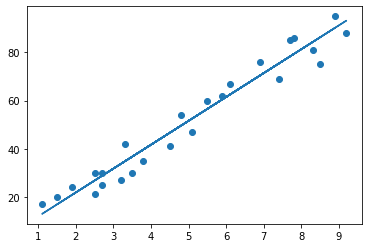

In [ ]:
line = lr.coef_*X+lr.intercept_

plt.scatter(X,Y)
plt.plot(X, line)

# **Predicting some data values**

In [ ]:
Y_pred = lr.predict(X_test)
print("Predicted Values")
for i in range(len(X_test)):
  print(X_test[i],Y_pred[i])

Predicted Values
[1.5] 16.884144762398023
[3.2] 33.732260779489835
[7.4] 75.35701799818725
[2.5] 26.79480124304026
[5.9] 60.491033277223885


In [ ]:
df = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

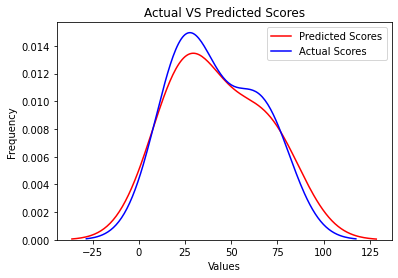

In [ ]:
import seaborn as sb
sb.distplot(Y_pred, hist = False, color = 'r', label = 'Predicted Scores')
sb.distplot(Y_test, hist = False, color = 'b', label = 'Actual Scores')
plt.legend(loc = 'upper right')
plt.title("Actual VS Predicted Scores")
plt.xlabel("Values")
plt.ylabel("Frequency")

# **Evaluating Model**

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error: 4.183859899002982


# **Predicting Scores**

In [ ]:
#Predicting the score when studied for 9.25 Hours
hours = 9.25
predicted_score = lr.predict([[hours]])
print("No of Hours = ",(hours))
print("Predicted Score =",predicted_score)

No of Hours =  9.25
Predicted Score = [93.69173249]
